In [ ]:
import urllib.request
import json

url = 'https://ckan-prod.sse.datopian.com/api/3/action/package_show?id=ssen_smart_meter_prod_lv_feeder'

try:
    with urllib.request.urlopen(url) as response:
        data = json.loads(response.read().decode())
        print(data)  # Display the fetched JSON data

except urllib.error.URLError as error:
    print('Error fetching data:', error)

{'help': 'https://data-api.ssen.co.uk/api/3/action/help_show?name=package_show', 'success': True, 'result': {'author': 'SSEN Distribution', 'author_email': 'data@ssen.co.uk', 'conforms_to': '', 'contact_point': '', 'contributor': '', 'coverage': [{'location_name': 'SEPD and SHEPD', 'name': 'SEPD and SHEPD Licence Areas', 'type': 'spatial'}], 'creator_user_id': '6823c5dc-f541-4ad7-b0ca-a4c3f425848f', 'format': ['Big Data'], 'has_version': '', 'ib1_access': '', 'ib1_sensitivity_class': 'IB1-O', 'id': '127bc139-0f47-499b-b6d7-19d66cdaf595', 'is_version_of': '', 'isopen': True, 'language': 'EN', 'license_id': 'CC-BY-4.0', 'license_title': 'Creative Commons Attribution 4.0', 'license_url': 'https://creativecommons.org/licenses/by/4.0/', 'maintainer': '', 'maintainer_email': '', 'metadata_created': '2024-02-28T17:40:45.867831', 'metadata_modified': '2025-01-20T15:07:04.149648', 'name': 'ssen_smart_meter_prod_lv_feeder', 'notes': 'Smart meter LV feeder half hourly usage data is collected dire

In [ ]:
import pandas as pd
import json

# Assuming you already have the JSON data stored in the variable `data`
# Convert the JSON "result" section into a DataFrame
data_json = data['result']  # Extract the relevant data
df = pd.json_normalize(data_json)  # Flatten nested JSON if needed

# Display the structure and first few rows of the DataFrame
print("Dataset Columns:\n", df.columns)
print("\nFirst Few Rows:\n", df.head())
print("\nData Types:\n", df.dtypes)


Dataset Columns:
 Index(['author', 'author_email', 'conforms_to', 'contact_point', 'contributor',
       'coverage', 'creator_user_id', 'format', 'has_version', 'ib1_access',
       'ib1_sensitivity_class', 'id', 'is_version_of', 'isopen', 'language',
       'license_id', 'license_title', 'license_url', 'maintainer',
       'maintainer_email', 'metadata_created', 'metadata_modified', 'name',
       'notes', 'num_resources', 'num_tags', 'owner_org', 'private',
       'relation', 'source', 'state', 'title', 'type', 'url', 'version',
       'groups', 'resources', 'tags', 'relationships_as_subject',
       'relationships_as_object', 'organization.id', 'organization.name',
       'organization.title', 'organization.type', 'organization.description',
       'organization.image_url', 'organization.created',
       'organization.is_organization', 'organization.approval_status',
       'organization.state'],
      dtype='object')

First Few Rows:
               author     author_email conforms_

In [ ]:
# Inspect nested fields: resources and coverage
print("\nResources Field Content:\n", df['resources'].iloc[0])
print("\nCoverage Field Content:\n", df['coverage'].iloc[0])

# If nested, normalize the fields
resources_data = pd.json_normalize(df['resources']) if df['resources'].notnull().all() else None
coverage_data = pd.json_normalize(df['coverage']) if df['coverage'].notnull().all() else None

# Display the structures of these normalized data
if resources_data is not None:
    print("\nNormalized Resources Data:\n", resources_data.head())
if coverage_data is not None:
    print("\nNormalized Coverage Data:\n", coverage_data.head())



Resources Field Content:
 [{'cache_last_updated': None, 'cache_url': None, 'created': '2024-02-28T17:42:21.108915', 'datastore_active': False, 'description': 'Explore Smart Meter LV Feeder data:  \r\n\r\n1. Start with the lookup tool to identify your LV Feeder Dataset ID. You can enter your postcode to find the associated Dataset ID.  \r\n2. Switch to the second tab where you can preview the actual data. You can use filtering functionality to get only a subset of the larger data table. Use your Dataset ID number here.  \r\n3. Explore the data relevant to your LV Feeder Dataset. You can also download it to conduct further analysis in your own tool. \r\n \r\n4. If the data you are looking for is older than 365 days, you can browse raw data files available in the third tab. All data is stored as flat files and organized by date so that you can find and download specific data files in CSV format.', 'format': 'Big Data', 'hash': '', 'id': '1cce1fb4-d7f4-4309-b9e3-943bd4d18618', 'last_modif

In [ ]:
# Extract all URLs and descriptions from the resources field
resources_data = pd.json_normalize(df['resources'].iloc[0])
print("\nResources Data:\n", resources_data[['name', 'description', 'url']])



Resources Data:
                                             name  \
0                     Smart Meter LV Feeder Data   
1  Smart Meter LV Feeder Usage Video Walkthrough   
2        Smart Meter LV Feeder Walkthrough Guide   

                                         description  \
0  Explore Smart Meter LV Feeder data:  \r\n\r\n1...   
1  SSEN Distributions video walkthrough guide for...   
2  SSEN Distributions PDF walkthrough guide for t...   

                                                 url  
0              https://gql.internal.datopian.com/v1/  
1  https://data-api.ssen.co.uk/dataset/127bc139-0...  
2  https://data-api.ssen.co.uk/dataset/127bc139-0...  


In [ ]:
import requests

# Main dataset URL
url = "https://gql.internal.datopian.com/v1/"

try:
    response = requests.get(url)
    if response.status_code == 200:
        # Save the dataset locally if it's downloadable
        with open("smart_meter_data.json", "w") as file:
            file.write(response.text)
        print("Dataset downloaded successfully!")
    else:
        print(f"Failed to fetch dataset. Status code: {response.status_code}")
except Exception as e:
    print(f"Error fetching dataset: {e}")


Failed to fetch dataset. Status code: 404


In [ ]:
import requests
import pandas as pd

base_url = "API_ENDPOINT_HERE"  # Replace with the actual API endpoint
start_date = "2024-01-01"  # Adjust as needed
end_date = "2024-01-07"    # A smaller range for initial download

# Parameters for filtering
params = {
    "start_date": start_date,
    "end_date": end_date,
    "dataset_id": "DATASET_ID"  # Replace with specific Dataset ID if needed
}

# Fetch data
response = requests.get(base_url, params=params)
if response.status_code == 200:
    data = response.json()
    # Convert to a DataFrame for analysis
    df = pd.json_normalize(data)
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")


MissingSchema: Invalid URL 'API_ENDPOINT_HERE': No scheme supplied. Perhaps you meant https://API_ENDPOINT_HERE?

In [ ]:
import pandas as pd

# Upload the Lookup dataset to Google Colab
from google.colab import files
uploaded = files.upload()  # Select the file (CSV/JSON) after running this

# Load the dataset into a pandas DataFrame
lookup_df = pd.read_csv("ssen_smart_meter_prod_lv_feeder_lookup_21_01_2025.csv")
print("Columns in Lookup Dataset:\n", lookup_df.columns)
print("\nSample Rows:\n", lookup_df.head())



Saving ssen_smart_meter_prod_lv_feeder_lookup_21_01_2025.csv to ssen_smart_meter_prod_lv_feeder_lookup_21_01_2025 (1).csv
Columns in Lookup Dataset:
 Index(['dataset_id', 'postcode', 'primary_substation_id',
       'primary_substation_name', 'hv_feeder_id', 'hv_feeder_name',
       'secondary_substation_id', 'secondary_substation_name', 'lv_feeder_id',
       'lv_feeder_name', 'total_mpan_count'],
      dtype='object')

Sample Rows:
    dataset_id postcode  primary_substation_id primary_substation_name  \
0  2400201505      NaN                     24                OVERGATE   
1  2400801501      NaN                     24                OVERGATE   
2  3300402502      NaN                     33         ROSEBANK STREET   
3  8200218801      NaN                     82               LUNANHEAD   
4  8200404003      NaN                     82               LUNANHEAD   

   hv_feeder_id        hv_feeder_name  secondary_substation_id  \
0             2           SEAFIELD RD                    

In [ ]:
# Filter by postcode (replace 'Your Postcode' with the actual value)
filtered_lookup = lookup_df[lookup_df['postcode'] == 'Your Postcode']

# OR Filter by primary substation name
filtered_lookup = lookup_df[lookup_df['primary_substation_name'] == 'OVERGATE']

# OR Filter by high-voltage feeder name
filtered_lookup = lookup_df[lookup_df['hv_feeder_name'] == 'SEAFIELD RD']

# OR Filter by total meters (e.g., datasets with > 50 meters)
filtered_lookup = lookup_df[lookup_df['total_mpan_count'] > 50]

# Extract relevant Dataset IDs
dataset_ids = filtered_lookup['dataset_id'].unique()
print("Filtered Dataset IDs:\n", dataset_ids)


Filtered Dataset IDs:
 [  2400201505   3300402502   8200404003 ... 730800606003 730800536502
 730800308002]


In [ ]:
import pandas as pd
import glob

# Combine all usage files into a single DataFrame
usage_files = glob.glob("*.csv")  # Adjust path if necessary
usage_data = pd.concat((pd.read_csv(file) for file in usage_files), ignore_index=True)

# Display the structure of the combined dataset
print("Combined Dataset Shape:", usage_data.shape)
print("\nColumns in Dataset:\n", usage_data.columns)
print("\nSample Rows:\n", usage_data.head())


Combined Dataset Shape: (311346, 23)

Columns in Dataset:
 Index(['dataset_id', 'dno_name', 'dno_alias', 'secondary_substation_id',
       'secondary_substation_name', 'lv_feeder_id', 'lv_feeder_name',
       'substation_geo_location', 'aggregated_device_count_active',
       'primary_consumption_active_import',
       'secondary_consumption_active_import',
       'total_consumption_active_import', 'aggregated_device_count_reactive',
       'total_consumption_reactive_import', 'data_collection_log_timestamp',
       'insert_time', 'last_modified_time', 'postcode',
       'primary_substation_id', 'primary_substation_name', 'hv_feeder_id',
       'hv_feeder_name', 'total_mpan_count'],
      dtype='object')

Sample Rows:
    dataset_id                                    dno_name dno_alias  \
0  2400201505  Scottish and Southern Electricity Networks      SSEN   
1  2400201505  Scottish and Southern Electricity Networks      SSEN   
2  2400201505  Scottish and Southern Electricity Networks 

In [ ]:
# Filter data using the Dataset IDs from the Lookup Dataset
filtered_data = usage_data[usage_data['dataset_id'].isin(dataset_ids)]
print("Filtered Data Shape:", filtered_data.shape)
print("\nFiltered Data Sample:\n", filtered_data.head())


Filtered Data Shape: (154370, 23)

Filtered Data Sample:
    dataset_id                                    dno_name dno_alias  \
0  2400201505  Scottish and Southern Electricity Networks      SSEN   
1  2400201505  Scottish and Southern Electricity Networks      SSEN   
2  2400201505  Scottish and Southern Electricity Networks      SSEN   
3  2400201505  Scottish and Southern Electricity Networks      SSEN   
4  2400201505  Scottish and Southern Electricity Networks      SSEN   

   secondary_substation_id secondary_substation_name  lv_feeder_id  \
0                       15            SEAFIELD RD T2             5   
1                       15            SEAFIELD RD T2             5   
2                       15            SEAFIELD RD T2             5   
3                       15            SEAFIELD RD T2             5   
4                       15            SEAFIELD RD T2             5   

  lv_feeder_name  substation_geo_location  aggregated_device_count_active  \
0            NaN 

In [ ]:
import matplotlib.pyplot as plt

# Example: Plot energy usage for one Dataset ID
single_dataset = filtered_data[filtered_data['dataset_id'] == 2400201505]
plt.plot(single_dataset['timestamp'], single_dataset['energy_usage'])
plt.title('Energy Usage Over Time for Dataset ID 2400201505')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Wh)')
plt.xticks(rotation=45)
plt.show()


KeyError: 'timestamp'

In [ ]:
print("Columns in the Combined Dataset:\n", usage_data.columns)


Columns in the Combined Dataset:
 Index(['dataset_id', 'dno_name', 'dno_alias', 'secondary_substation_id',
       'secondary_substation_name', 'lv_feeder_id', 'lv_feeder_name',
       'substation_geo_location', 'aggregated_device_count_active',
       'primary_consumption_active_import',
       'secondary_consumption_active_import',
       'total_consumption_active_import', 'aggregated_device_count_reactive',
       'total_consumption_reactive_import', 'data_collection_log_timestamp',
       'insert_time', 'last_modified_time', 'postcode',
       'primary_substation_id', 'primary_substation_name', 'hv_feeder_id',
       'hv_feeder_name', 'total_mpan_count'],
      dtype='object')


In [ ]:
print("Sample Data Collection Timestamps:\n", usage_data['data_collection_log_timestamp'].head())
print("Sample Insert Times:\n", usage_data['insert_time'].head())
print("Sample Last Modified Times:\n", usage_data['last_modified_time'].head())


Sample Data Collection Timestamps:
 0    2024-07-27T04:00:00Z
1    2024-07-27T05:30:00Z
2    2024-07-27T06:00:00Z
3    2024-07-27T06:30:00Z
4    2024-07-27T07:30:00Z
Name: data_collection_log_timestamp, dtype: object
Sample Insert Times:
 0    2024-07-29T01:04:58Z
1    2024-07-29T01:04:58Z
2    2024-07-29T01:04:58Z
3    2024-07-29T01:04:58Z
4    2024-07-29T01:04:58Z
Name: insert_time, dtype: object
Sample Last Modified Times:
 0    2024-07-30T14:36:21.393Z
1    2024-07-30T14:36:21.393Z
2    2024-07-30T14:36:21.393Z
3    2024-07-30T14:36:21.393Z
4    2024-07-30T14:36:21.393Z
Name: last_modified_time, dtype: object


TypeError: 'value' must be an instance of str or bytes, not a float

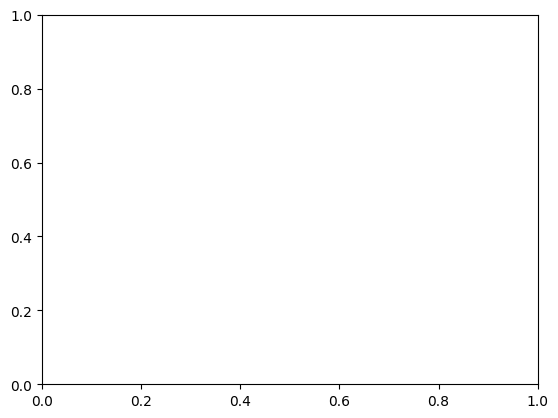

In [ ]:
single_dataset = filtered_data[filtered_data['dataset_id'] == 2400201505]
plt.plot(single_dataset['data_collection_log_timestamp'], single_dataset['total_consumption_active_import'])
plt.title('Energy Usage Over Time for Dataset ID 2400201505')
plt.xlabel('Timestamp')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


Data Types of Columns:
 dataset_id                               int64
dno_name                                object
dno_alias                               object
secondary_substation_id                  int64
secondary_substation_name               object
lv_feeder_id                             int64
lv_feeder_name                          object
substation_geo_location                float64
aggregated_device_count_active         float64
primary_consumption_active_import      float64
secondary_consumption_active_import    float64
total_consumption_active_import        float64
aggregated_device_count_reactive       float64
total_consumption_reactive_import      float64
data_collection_log_timestamp           object
insert_time                             object
last_modified_time                      object
postcode                                object
primary_substation_id                  float64
primary_substation_name                 object
hv_feeder_id                        

<ipython-input-16-12f57382eeed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_dataset['data_collection_log_timestamp'] = pd.to_datetime(single_dataset['data_collection_log_timestamp'], errors='coerce')


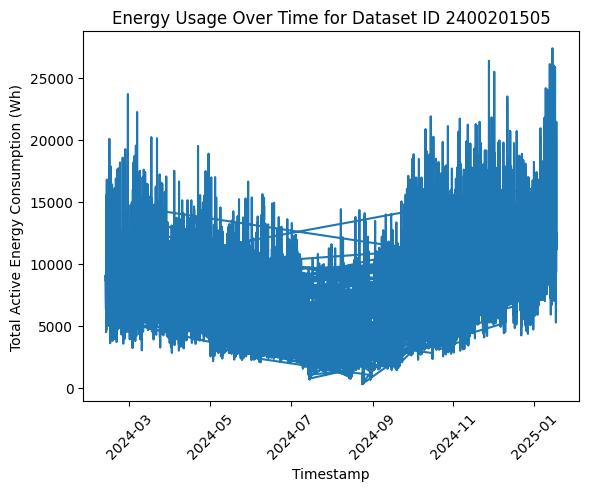

In [ ]:
print("Data Types of Columns:\n", single_dataset.dtypes)

print("Missing Values in Data Collection Log Timestamp:\n", single_dataset['data_collection_log_timestamp'].isnull().sum())
print("Missing Values in Total Consumption Active Import:\n", single_dataset['total_consumption_active_import'].isnull().sum())
print("Sample Data:\n", single_dataset[['data_collection_log_timestamp', 'total_consumption_active_import']].head())

single_dataset['data_collection_log_timestamp'] = pd.to_datetime(single_dataset['data_collection_log_timestamp'], errors='coerce')
single_dataset = single_dataset.dropna(subset=['data_collection_log_timestamp'])
single_dataset = single_dataset.dropna(subset=['total_consumption_active_import'])

plt.plot(single_dataset['data_collection_log_timestamp'], single_dataset['total_consumption_active_import'])
plt.title('Energy Usage Over Time for Dataset ID 2400201505')
plt.xlabel('Timestamp')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


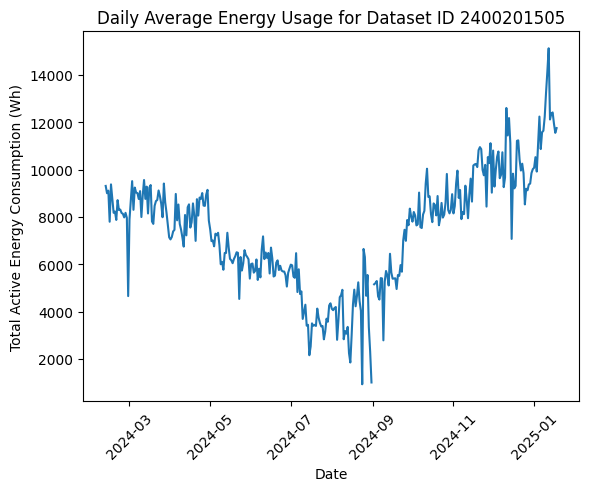

In [ ]:
# Convert timestamp to datetime if not already done
single_dataset['data_collection_log_timestamp'] = pd.to_datetime(single_dataset['data_collection_log_timestamp'])

# Set the timestamp as the DataFrame index
single_dataset.set_index('data_collection_log_timestamp', inplace=True)

# Resample to daily data and calculate the average
daily_data = single_dataset['total_consumption_active_import'].resample('D').mean()

# Plot the aggregated data
plt.plot(daily_data.index, daily_data.values)
plt.title('Daily Average Energy Usage for Dataset ID 2400201505')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


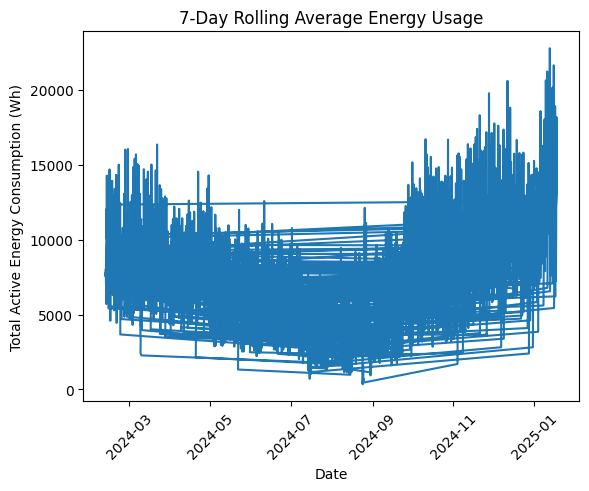

In [ ]:
# Calculate a 7-day rolling average
single_dataset['rolling_avg'] = single_dataset['total_consumption_active_import'].rolling(window=7).mean()

# Plot the rolling average
plt.plot(single_dataset.index, single_dataset['rolling_avg'])
plt.title('7-Day Rolling Average Energy Usage')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


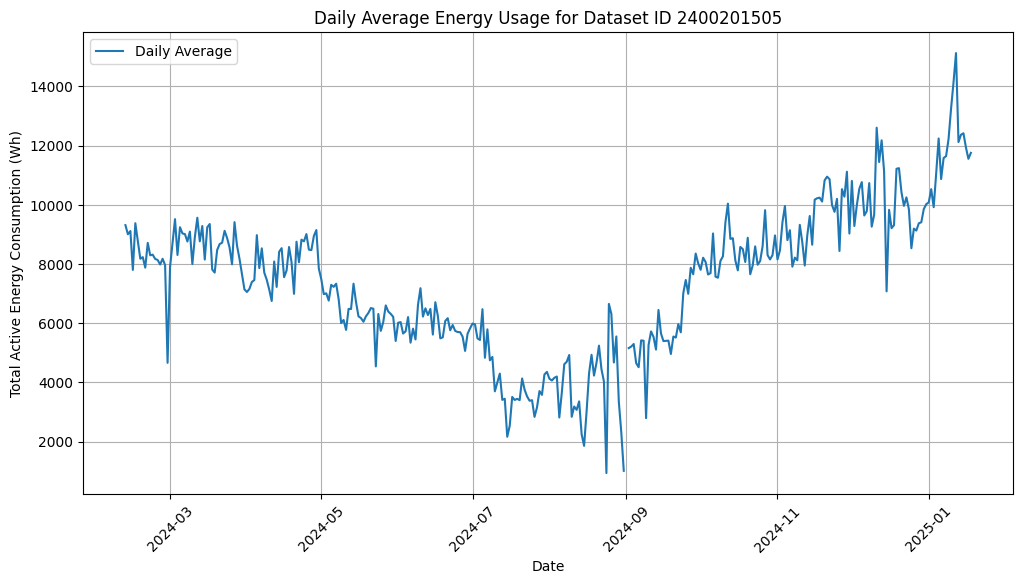

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(daily_data.index, daily_data.values, label='Daily Average')
plt.grid(True)
plt.title('Daily Average Energy Usage for Dataset ID 2400201505')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-21-9cc458406379>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = single_dataset['total_consumption_active_import'].resample('M').sum()


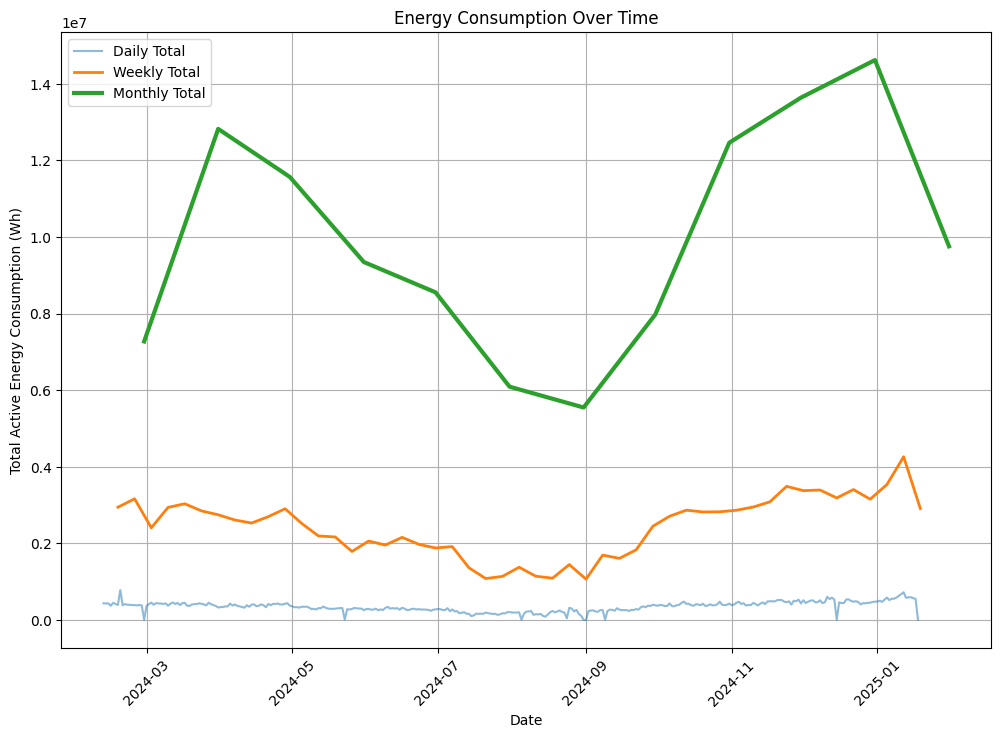

In [ ]:
# Daily aggregation
daily_data = single_dataset['total_consumption_active_import'].resample('D').sum()

# Weekly aggregation
weekly_data = single_dataset['total_consumption_active_import'].resample('W').sum()

# Monthly aggregation
monthly_data = single_dataset['total_consumption_active_import'].resample('M').sum()

# Plot all in one figure
plt.figure(figsize=(12, 8))
plt.plot(daily_data.index, daily_data.values, label='Daily Total', alpha=0.5)
plt.plot(weekly_data.index, weekly_data.values, label='Weekly Total', linewidth=2)
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Total', linewidth=3)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


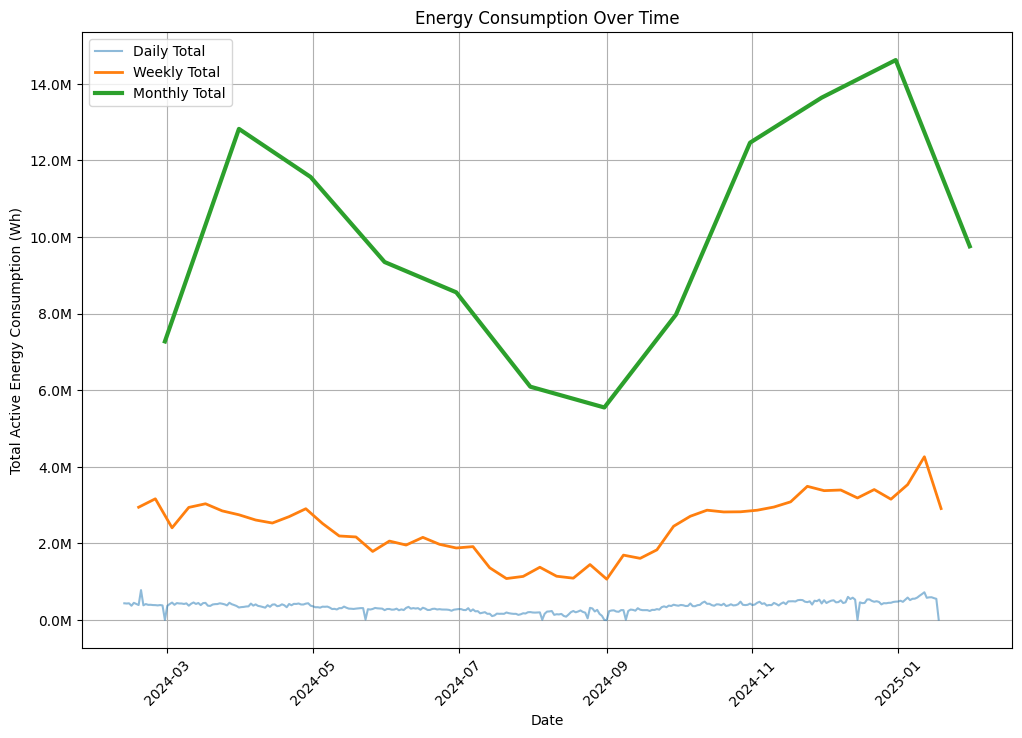

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))
plt.plot(daily_data.index, daily_data.values, label='Daily Total', alpha=0.5)
plt.plot(weekly_data.index, weekly_data.values, label='Weekly Total', linewidth=2)
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Total', linewidth=3)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')

# Format y-axis to display in millions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


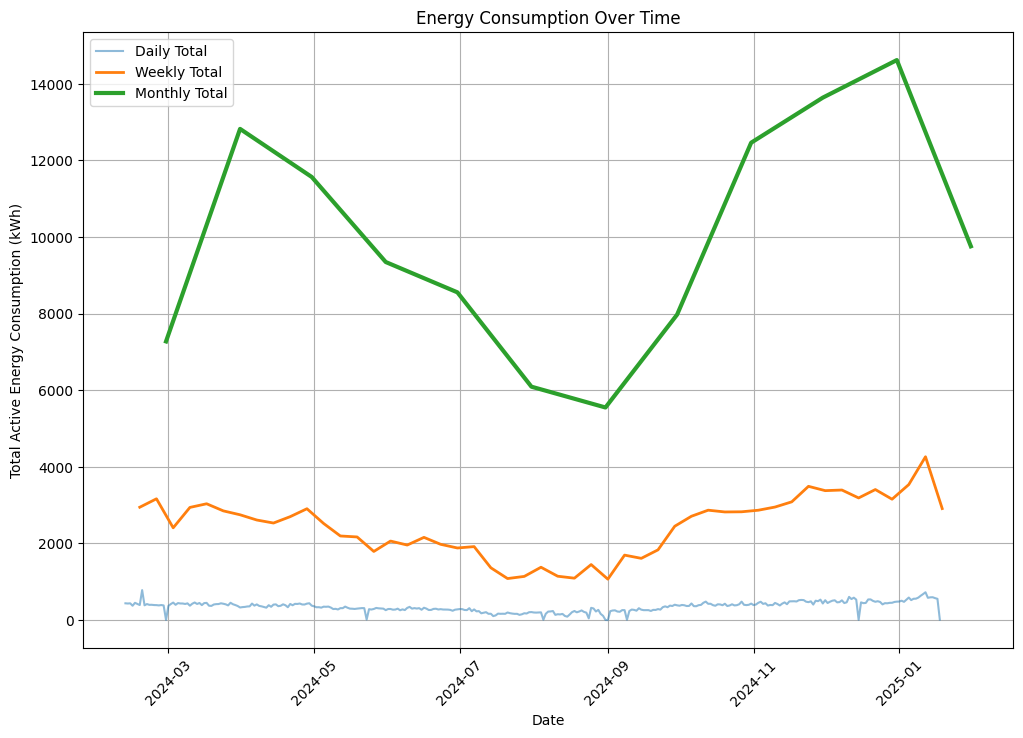

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(daily_data.index, daily_data.values, label='Daily Total', alpha=0.5)
plt.plot(weekly_data.index, weekly_data.values, label='Weekly Total', linewidth=2)
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Total', linewidth=3)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (kWh)')

# Format y-axis to display values without appending "k"
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}'))

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



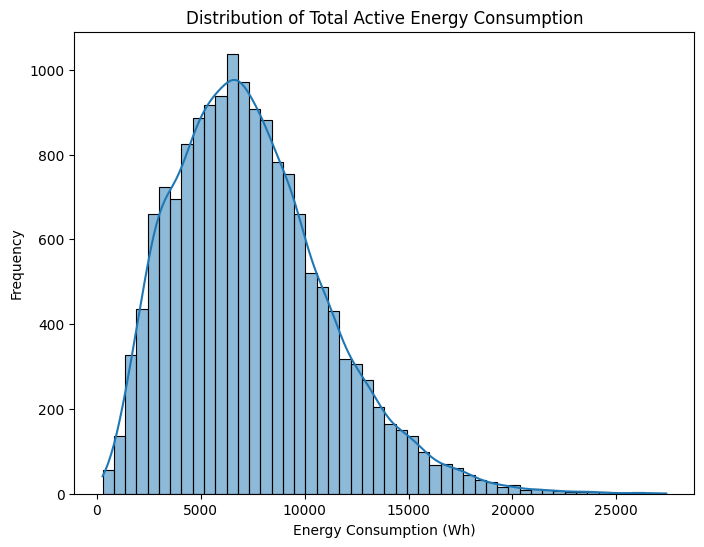

In [ ]:
import seaborn as sns

# Histogram of energy usage
plt.figure(figsize=(8, 6))
sns.histplot(single_dataset['total_consumption_active_import'], kde=True, bins=50)
plt.title('Distribution of Total Active Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()



Top 10 Peak Consumption Days:
 data_collection_log_timestamp
2024-02-19 00:00:00+00:00    781953.0
2025-01-12 00:00:00+00:00    726068.0
2025-01-11 00:00:00+00:00    678721.0
2025-01-10 00:00:00+00:00    635607.0
2024-12-11 00:00:00+00:00    605042.0
2025-01-15 00:00:00+00:00    596015.0
2025-01-14 00:00:00+00:00    593620.0
2025-01-05 00:00:00+00:00    587594.0
2025-01-09 00:00:00+00:00    586921.0
2024-12-13 00:00:00+00:00    584567.0
Name: total_consumption_active_import, dtype: float64


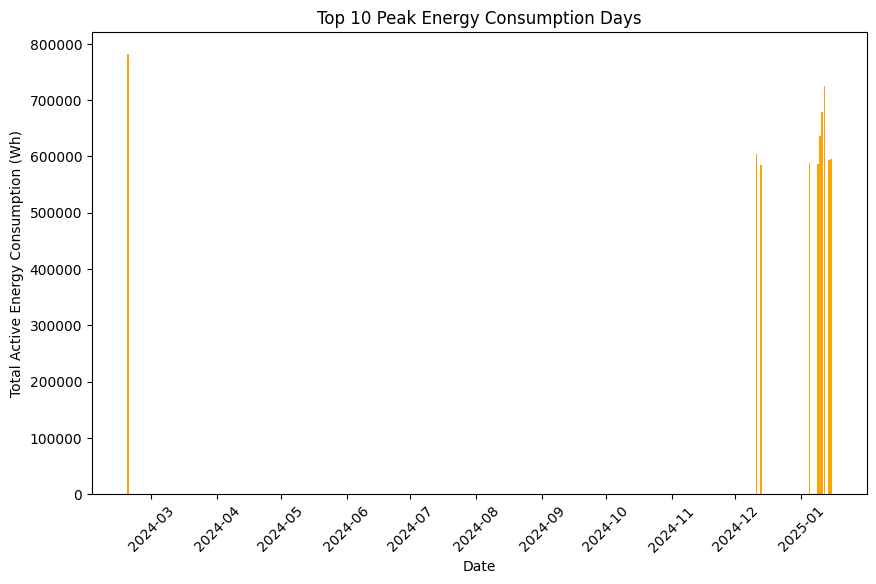

In [ ]:
# Identify peak consumption days
peak_days = daily_data.nlargest(10)  # Top 10 highest consumption days
print("Top 10 Peak Consumption Days:\n", peak_days)

# Plot peaks
plt.figure(figsize=(10, 6))
plt.bar(peak_days.index, peak_days.values, color='orange')
plt.title('Top 10 Peak Energy Consumption Days')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


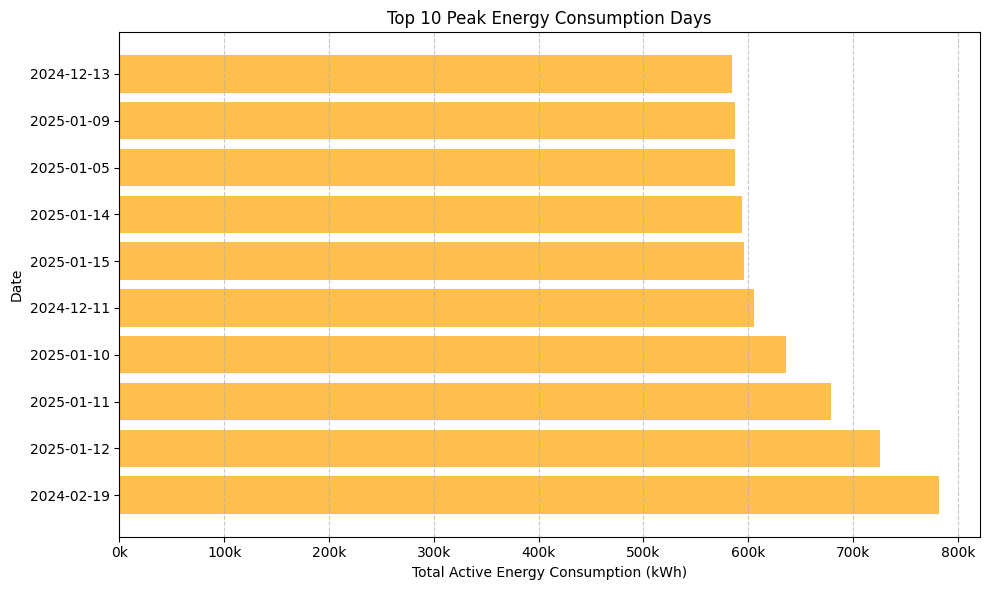

In [ ]:
# Sort data for top 10 peak energy consumption days
top_10_data = daily_data.nlargest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_data.index.strftime('%Y-%m-%d'), top_10_data.values, color='orange', alpha=0.7)
plt.title('Top 10 Peak Energy Consumption Days')
plt.xlabel('Total Active Energy Consumption (kWh)')
plt.ylabel('Date')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}k'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


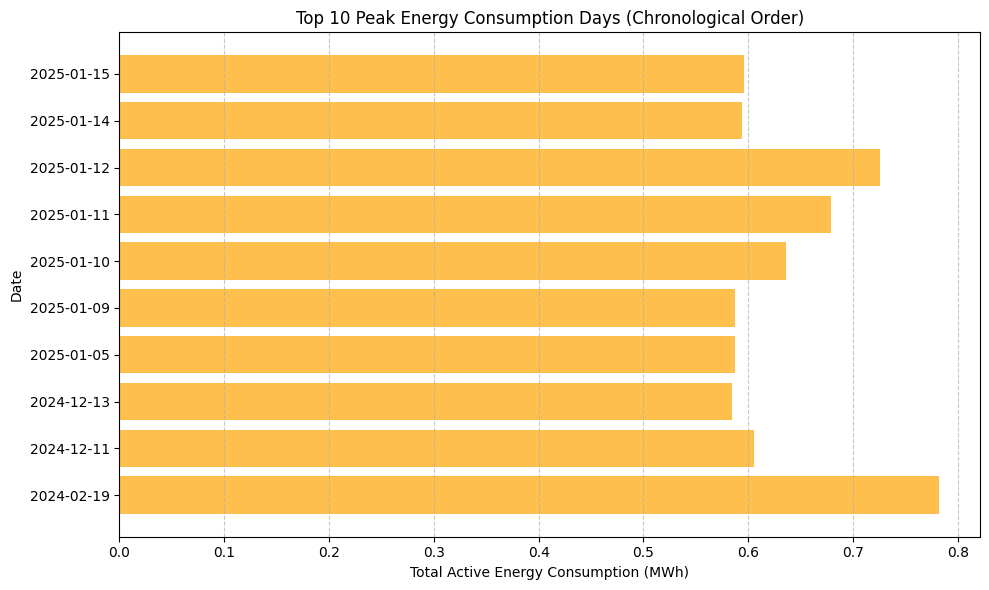

In [ ]:
# Sort top 10 data by date
top_10_data_chronological = top_10_data.sort_index()

# Create a horizontal bar plot in chronological order
plt.figure(figsize=(10, 6))
plt.barh(top_10_data_chronological.index.strftime('%Y-%m-%d'),
         top_10_data_chronological.values / 1e6,  # Convert to MWh
         color='orange',
         alpha=0.7)
plt.title('Top 10 Peak Energy Consumption Days (Chronological Order)')
plt.xlabel('Total Active Energy Consumption (MWh)')  # Update label to MWh
plt.ylabel('Date')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


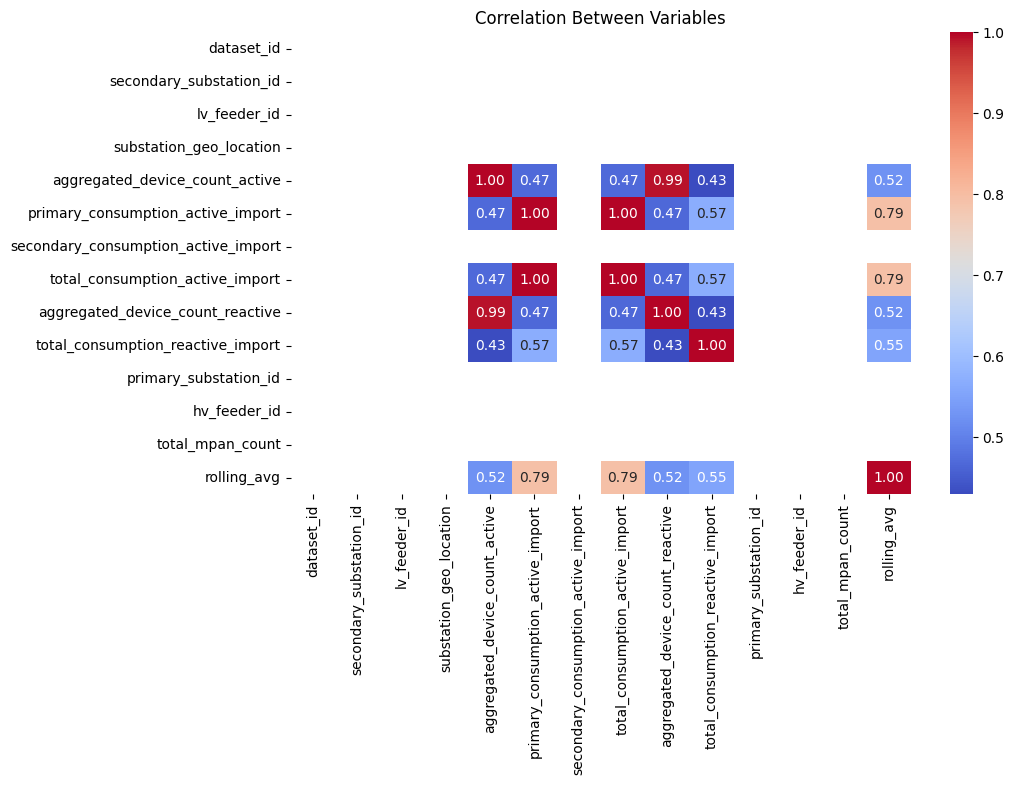

Numeric Columns:
 Index(['dataset_id', 'secondary_substation_id', 'lv_feeder_id',
       'substation_geo_location', 'aggregated_device_count_active',
       'primary_consumption_active_import',
       'secondary_consumption_active_import',
       'total_consumption_active_import', 'aggregated_device_count_reactive',
       'total_consumption_reactive_import', 'primary_substation_id',
       'hv_feeder_id', 'total_mpan_count', 'rolling_avg'],
      dtype='object')


In [ ]:
# Select only numeric columns
numeric_data = single_dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.show()

print("Numeric Columns:\n", numeric_data.columns)

# Fill missing values with zeros (or use another strategy like mean/median)
numeric_data = numeric_data.fillna(0)

# Alternatively, drop rows with missing values
# numeric_data = numeric_data.dropna()




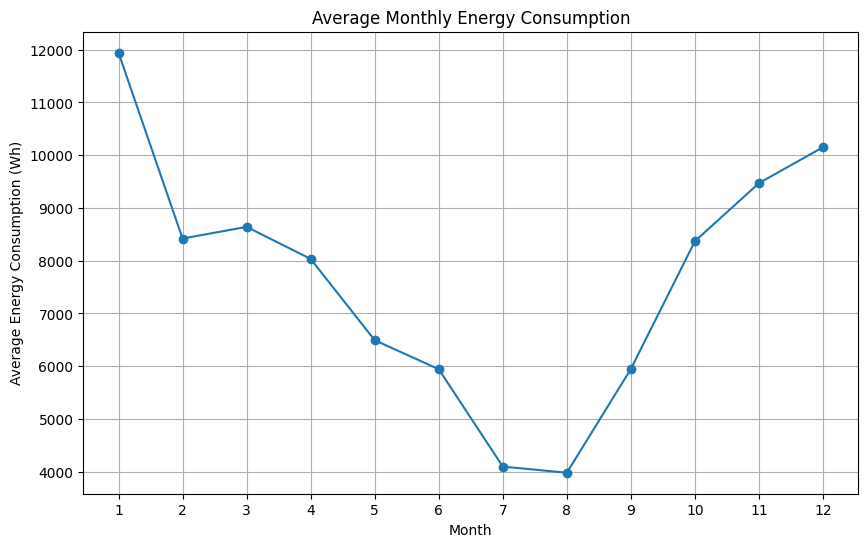

In [ ]:
# Group by month
single_dataset['month'] = single_dataset.index.month
monthly_avg = single_dataset.groupby('month')['total_consumption_active_import'].mean()

# Plot monthly average
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (Wh)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


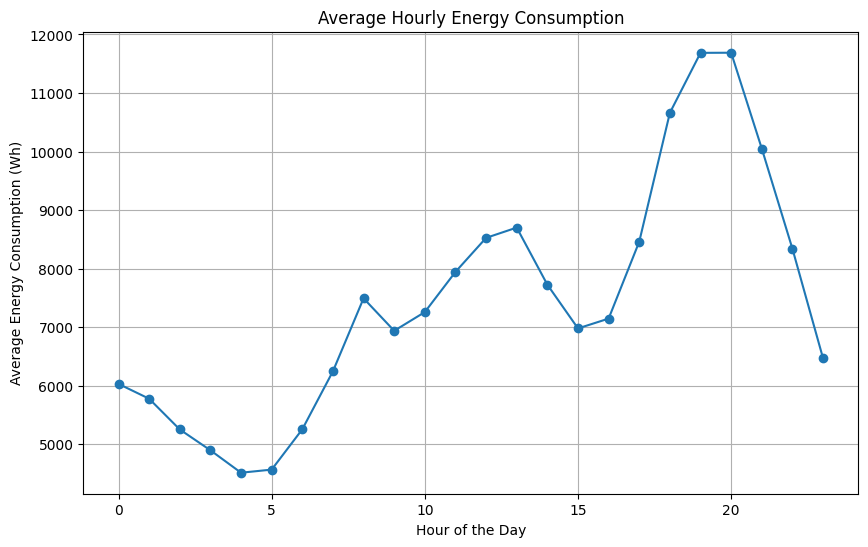

In [ ]:
# Extract hour from timestamp
single_dataset['hour'] = single_dataset.index.hour
hourly_avg = single_dataset.groupby('hour')['total_consumption_active_import'].mean()

# Plot hourly average
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (Wh)')
plt.grid(True)
plt.show()


<ipython-input-34-c14da56636fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['data_collection_log_timestamp'] = pd.to_datetime(comparison_data['data_collection_log_timestamp'])


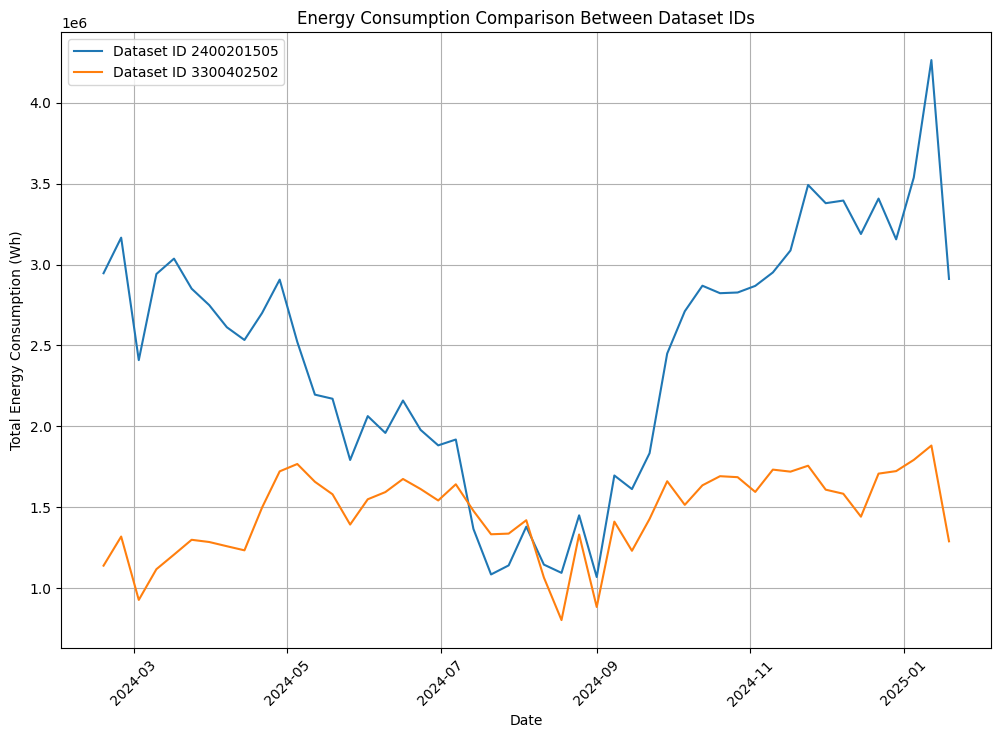

In [ ]:
# Convert the timestamp column to datetime if not already done
comparison_data['data_collection_log_timestamp'] = pd.to_datetime(comparison_data['data_collection_log_timestamp'])

# Set the datetime column as the index
comparison_data.set_index('data_collection_log_timestamp', inplace=True)

# Group by dataset_id and resample to weekly data
comparison_grouped = comparison_data.groupby('dataset_id')['total_consumption_active_import'].resample('W').sum()

# Plot the comparison
plt.figure(figsize=(12, 8))
for dataset_id, group in comparison_grouped.groupby(level=0):
    plt.plot(group.index.get_level_values(1), group.values, label=f'Dataset ID {dataset_id}')

plt.title('Energy Consumption Comparison Between Dataset IDs')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



<ipython-input-38-2bb90976a303>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['data_collection_log_timestamp'] = pd.to_datetime(comparison_data['data_collection_log_timestamp'])


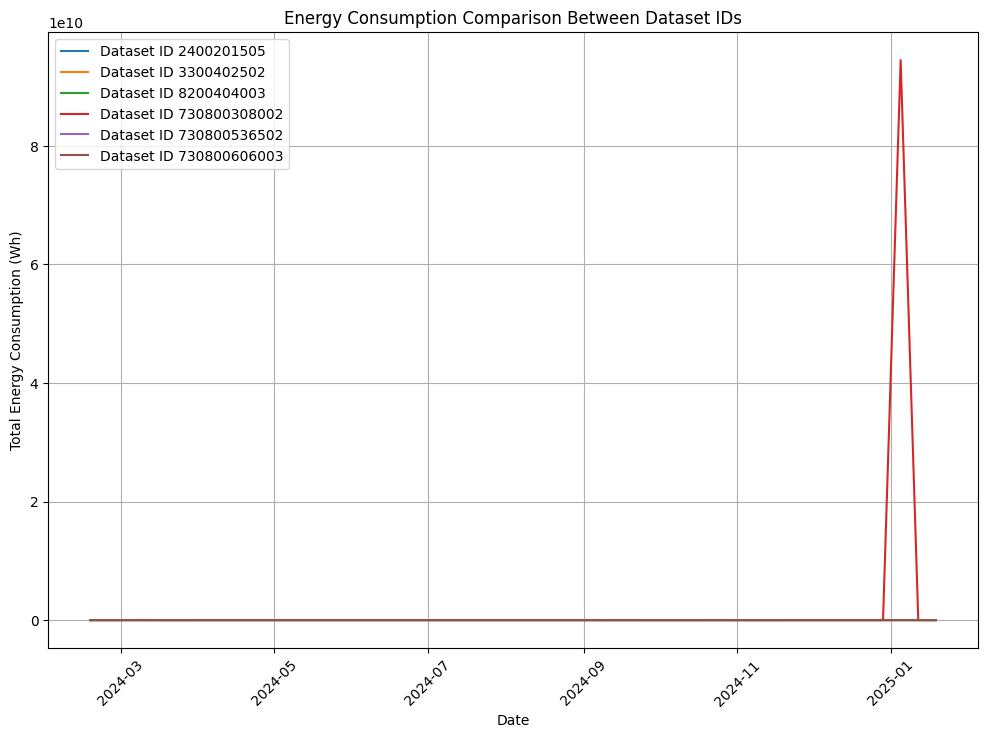

In [ ]:
# Filter for the dataset IDs in the filtered list
comparison_data = filtered_data[filtered_data['dataset_id'].isin([2400201505, 3300402502, 8200404003, 730800606003, 730800536502, 730800308002])]

# Convert timestamp to datetime and set as index if not already done
comparison_data['data_collection_log_timestamp'] = pd.to_datetime(comparison_data['data_collection_log_timestamp'])
comparison_data.set_index('data_collection_log_timestamp', inplace=True)

# Group by dataset ID and resample weekly
comparison_grouped = comparison_data.groupby('dataset_id')['total_consumption_active_import'].resample('W').sum()

import matplotlib.pyplot as plt

# Plot comparison
plt.figure(figsize=(12, 8))
for dataset_id, group in comparison_grouped.groupby(level=0):
    plt.plot(group.index.get_level_values(1), group.values, label=f'Dataset ID {dataset_id}')

plt.title('Energy Consumption Comparison Between Dataset IDs')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Valid Dataset IDs:
 Index([2400201505, 3300402502, 8200404003, 730800536502, 730800606003], dtype='int64', name='dataset_id')


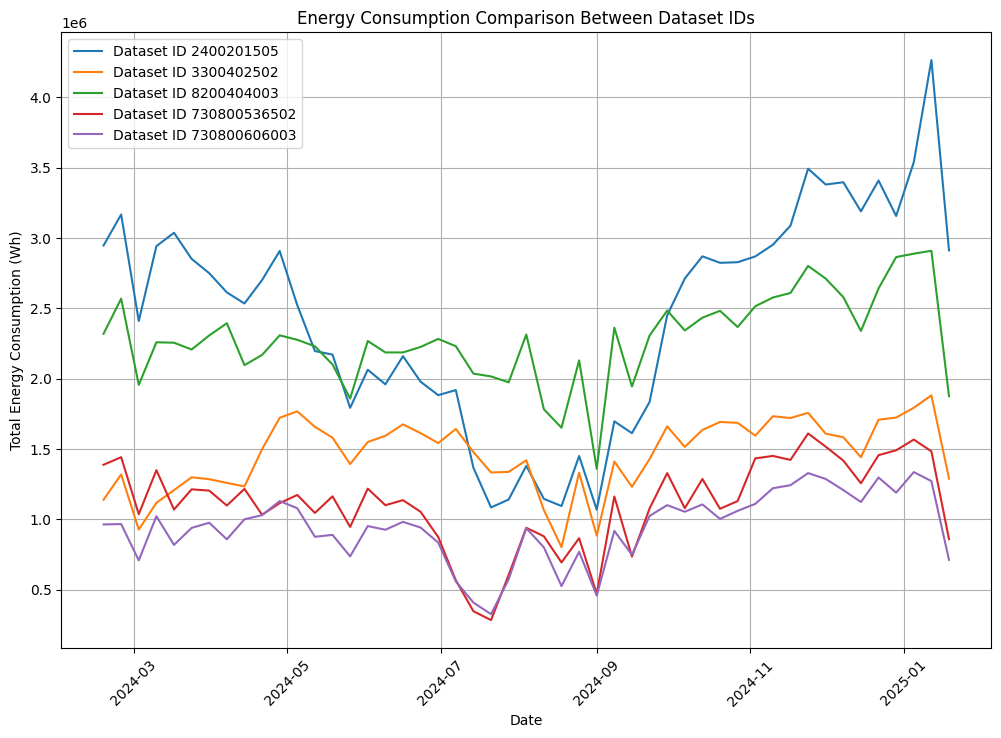

In [ ]:
# Define a threshold for total consumption
some_threshold = 1e+10  # Exclude datasets with consumption above this value

# Filter out dataset IDs with excessive total consumption
valid_ids = total_consumption[total_consumption < some_threshold].index
comparison_data = comparison_data[comparison_data['dataset_id'].isin(valid_ids)]

# Check the remaining valid dataset IDs
print("Valid Dataset IDs:\n", valid_ids)

# Group by dataset ID and resample to weekly
comparison_grouped = comparison_data.groupby('dataset_id')['total_consumption_active_import'].resample('W').sum()

# Plot the comparison
plt.figure(figsize=(12, 8))
for dataset_id, group in comparison_grouped.groupby(level=0):
    plt.plot(group.index.get_level_values(1), group.values, label=f'Dataset ID {dataset_id}')

plt.title('Energy Consumption Comparison Between Dataset IDs')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





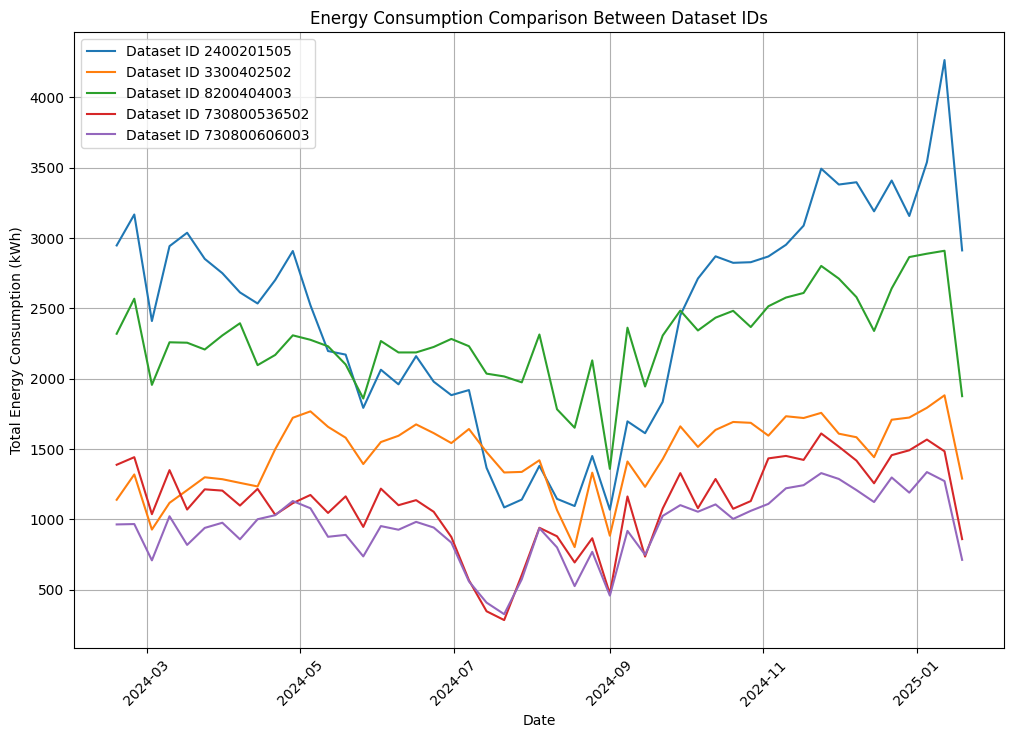

In [ ]:
# Group by dataset ID and resample to weekly
comparison_grouped = comparison_data.groupby('dataset_id')['total_consumption_active_import'].resample('W').sum()

# Plot the comparison
plt.figure(figsize=(12, 8))
for dataset_id, group in comparison_grouped.groupby(level=0):
    plt.plot(group.index.get_level_values(1), group.values, label=f'Dataset ID {dataset_id}')

plt.title('Energy Consumption Comparison Between Dataset IDs')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (kWh)')

# Format y-axis without appending "k"
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

